In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_final.csv')

In [3]:
df.head(3)

,Unnamed: 0,newsID,newsCategory,newsSubcategory,newsTitle,newsSubTitle,newsContent,partNum,useType,processType,processPattern,processLevel,sentenceCount,sentenceInfo
0,0,EC_M05_241847,경제,중기밴처,CCTV 영상으로 핫해진 에스원,"에스원 자체 제작 영상, 유튜브·틱톡 조회수 3500만회 돌파 유튜버들과 협업한 콘...","#. 서울의 한 카페, 아르바이트생이 마감 청소 중 춤을 추고 있다.\n춤 솜씨가 ...",P1,1,A,0,하,15,"[{'sentenceNo': 1, 'sentenceContent': '#. 서울의 ..."
1,1,EC_M05_241848,경제,유통,"홈플러스, 신년 '반값, 하나 더 데이' 행사…하루 빠른 31일 시작",NaN,"홈플러스는 새해 첫 쇼핑 축제 '반값, 하나 더 데이' 행사를 경쟁사 대비 하루 빠...",P1,1,A,0,하,8,"[{'sentenceNo': 1, 'sentenceContent': ""홈플러스는 새..."
2,2,EC_M05_241851,경제,유통,"제주삼다수, 글로벌 품질 인증 갱신",NaN,제주특별자치도개발공사는 제주삼다수의 품질경영표준 ISO9001을 갱신함과 동시에 미...,P1,1,A,0,하,6,"[{'sentenceNo': 1, 'sentenceContent': '제주특별자치도..."


In [4]:
df = df[['newsCategory','newsTitle','newsSubTitle','newsContent','useType','partNum','processPattern','sentenceCount']]
# df.to_csv('new_df_final.csv')

In [5]:
df[df['useType']==1]['processPattern'].value_counts()

processPattern
0    314093
Name: count, dtype: int64

In [6]:
df[df['useType']==0]['processPattern'].value_counts()

processPattern
99    242797
24     19821
11     18104
23     12233
12     10580
21      7333
22      5731
15      4968
14      4643
13      4290
16      2526
Name: count, dtype: int64

In [7]:
df.isnull().sum() # newsSubTitle 결측치를 어떻게 할건지  ??

newsCategory           0
newsTitle              0
newsSubTitle      430050
newsContent            0
useType                0
partNum                0
processPattern         0
sentenceCount          0
dtype: int64

<Axes: xlabel='partNum', ylabel='count'>

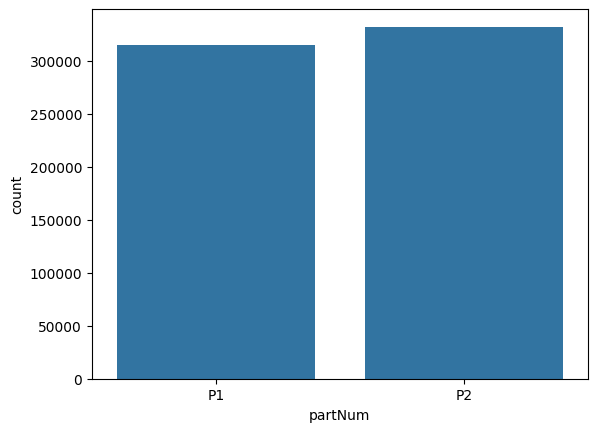

In [8]:
sns.countplot(x='partNum',data=df)

In [9]:
df['newsContent'].apply(lambda x : len(x)).sort_values(ascending=False) # 6000자 이상 되는것도 있음 

568709    6336
640279    6300
554902    5996
546289    5887
396949    5808
          ... 
465449     163
80978      163
376123     163
547621     141
205837     118
Name: newsContent, Length: 647119, dtype: int64

In [10]:
df['useType'].value_counts()

useType
0    333026
1    314093
Name: count, dtype: int64

In [11]:
df['processPattern'].value_counts()  # 유형 없는것들이 많은데 학습이 잘 될까 ?

processPattern
0     314093
99    242797
24     19821
11     18104
23     12233
12     10580
21      7333
22      5731
15      4968
14      4643
13      4290
16      2526
Name: count, dtype: int64

In [12]:
df.dropna(subset='newsSubTitle',inplace=True)

In [13]:
df

,newsCategory,newsTitle,newsSubTitle,newsContent,useType,partNum,processPattern,sentenceCount
0,경제,CCTV 영상으로 핫해진 에스원,"에스원 자체 제작 영상, 유튜브·틱톡 조회수 3500만회 돌파 유튜버들과 협업한 콘...","#. 서울의 한 카페, 아르바이트생이 마감 청소 중 춤을 추고 있다.\n춤 솜씨가 ...",1,P1,0,15
4,경제,"홍남기 \""항만사용료 감면 6개월 더\""…코로나 장기화에 한시조치 줄줄이 연장(상보)",비상경제 중앙대책본부회의,정부가 당초 올해 말까지 시행하려던 항만사용료 및 터미널 임대료 감면조치를 내년 6...,1,P1,0,13
5,경제,"김학도 중진공 이사장, 정책자금 접수 첫날 점검 나서","2022년 정책자금 신청·접수 진행 상황 확인…신속 집행 독려 모바일 브랜치 도입,...",중소벤처기업진흥공단(이하 중진공)은 김학도 이사장이 30일 경남 진주 중진공 본사에...,1,P1,0,10
6,경제,내년 車제도 어떻게 달라지나…개소세 인하 연장·전기차 보조금 축소,경차 취득세 감면 한도·시한 확대…공공기관 무공해차 의무구매비율 100%로,올해 말로 종료될 예정이었던 자동차 개별소비세 인하가 내년 6월까지 약 6개월 간 ...,1,P1,0,10
8,경제,"신한카드, 디지털화폐 오프라인 송금·지불 특허 취득",디지털 화폐 연구개발 강화 CBDC 등 오프라인 송금·지불하는 기술 특허 취득,신한카드가 미래 페이먼트 인프라 핵심인 디지털 화폐 연구개발을 강화한다.\n신한카드...,1,P1,0,11
...,...,...,...,...,...,...,...,...
647113,사회,"10명 중 6명 \""올해 설에도 가족 끼리 보낼 것\""…대신 선물은 고가로","롯데멤버스 성인 1,500명 설문10명 중 6명 \""설에도 가족끼리\""귀성 대신 선...",신종 코로나바이러스 감염증(코로나19) 사태가 1년을 맞은 가운데 성인 남녀 10명...,0,P1,12,17
647114,사회,25년 산통 끝 공수처 출범…처장 집중 권력에 ‘옥상옥’ 우려도,"\""검찰총장은 법무장관이 견제...공수처장은 없다\""",1996년 이후 추진과 무산이 반복되는 25년 산고 끝에 고위공직자범죄수사처(공수처...,0,P1,12,26
647115,사회,北대사 대리 잇단 탈북...이유는,외화벌이 금지 등 대북제재 강화에 추방 잇따라이탈리아 이어 쿠웨이트 대사대리도 국내...,북한 조성길 전 주이탈리아 대사대리에 이어 전 주쿠웨이트 대사대리도 한국에 입국한 ...,0,P1,12,19
647116,사회,"[단독] 靑청원서 폭로한 기획부동산 실체…\""구인광고로 상담원 모아 피라미드식 판매...","<중>수렁에 빠진 땅 매수자들▶사기 수법은실적 못내면 압박, 직원들 노려","“기획부동산이 서민들의 피 같은 생활자금과 여유자금, 종자돈을 투자하게 해 막대한 ...",0,P1,12,17


## 낚시 데이터 잘 생성 된건지 ?

### 1. 본문 , 제목 글자/단어 수 비교

In [14]:
df_o = df[df['useType']==0]    #낚시성기사
df_x = df[df['useType']==1]    #낚시성기사x

In [15]:
df_o.shape , df_x.shape

((109478, 8), (107591, 8))

In [16]:
df_o.head(3)

,newsCategory,newsTitle,newsSubTitle,newsContent,useType,partNum,processPattern,sentenceCount
133895,경제,"미스터피자 점주들, 구매협동조합으로 불공정 유통구조 개선한다",타 프랜차이즈로 확대될까?,미스터피자 점주들이 구매협동조합을 설립한다.\n가맹점주들이 구매협동조합을 설립하는 ...,0,P2,99,26
133908,경제,"SK하이닉스,'2020 ECO 비전'...지속가능경영 중장기 목표 선언",2022년까지 온실가스 배출 40% 감축 등,"SK하이닉스가 30일 '더 나은 세상을 위한 기술(Technology, for a ...",0,P2,99,19
133921,경제,서울 가계부채 7년새 90조 증가,부채 보유 가구의 63.0%는 원금상환과 이자 납부에 부담,"서울 지역의 가계부채가 7년간 90조원 증가한 것으로 나타났다.\n또, 서울 시민 ...",0,P2,99,27


In [17]:
df_x.head(3)

,newsCategory,newsTitle,newsSubTitle,newsContent,useType,partNum,processPattern,sentenceCount
0,경제,CCTV 영상으로 핫해진 에스원,"에스원 자체 제작 영상, 유튜브·틱톡 조회수 3500만회 돌파 유튜버들과 협업한 콘...","#. 서울의 한 카페, 아르바이트생이 마감 청소 중 춤을 추고 있다.\n춤 솜씨가 ...",1,P1,0,15
4,경제,"홍남기 \""항만사용료 감면 6개월 더\""…코로나 장기화에 한시조치 줄줄이 연장(상보)",비상경제 중앙대책본부회의,정부가 당초 올해 말까지 시행하려던 항만사용료 및 터미널 임대료 감면조치를 내년 6...,1,P1,0,13
5,경제,"김학도 중진공 이사장, 정책자금 접수 첫날 점검 나서","2022년 정책자금 신청·접수 진행 상황 확인…신속 집행 독려 모바일 브랜치 도입,...",중소벤처기업진흥공단(이하 중진공)은 김학도 이사장이 30일 경남 진주 중진공 본사에...,1,P1,0,10


In [18]:
df_o['본문글자수'] = df_o['newsContent'].map(lambda x : len(x))
df_x['본문글자수'] = df_x['newsContent'].map(lambda x : len(x))
df_o['제목글자수'] = df_o['newsTitle'].map(lambda x : len(x))
df_x['제목글자수'] = df_x['newsTitle'].map(lambda x : len(x))

C:\Users\administ\ipykernel_9616\1838152390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['본문글자수'] = df_o['newsContent'].map(lambda x : len(x))
C:\Users\administ\ipykernel_9616\1838152390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['본문글자수'] = df_x['newsContent'].map(lambda x : len(x))
C:\Users\administ\ipykernel_9616\1838152390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [19]:
df_x['본문글자수'].mean()

1217.9997490496417

In [20]:
print(f"낚시기사x 본문글자수 : {df_x['본문글자수'].mean()}")
print(f"낚시기사 본문글자수 : {df_o['본문글자수'].mean()} ")
print(f"낚시기사x 제목글자수 : {df_x['제목글자수'].mean()} ")
print(f"낚시기사 제목글자수 : {df_o['제목글자수'].mean()}  ")

낚시기사x 본문글자수 : 1217.9997490496417
낚시기사 본문글자수 : 1212.2218801951076 
낚시기사x 제목글자수 : 30.32116069187943 
낚시기사 제목글자수 : 29.075421545881365  


-> 낚시기사가 본문 , 제목 글자수 미세하게 더 작다 

In [21]:
df_o['newsContent'] = df_o['newsContent'].str.replace('\n', ' ')
df_o['newsContent'] = df_o['newsContent'].str.replace('\\', ' ')
df_o['newsContent'] = df_o['newsContent'].str.replace('.', ' ')

df_x['newsContent'] = df_x['newsContent'].str.replace('\n', ' ')
df_x['newsContent'] = df_x['newsContent'].str.replace('\\', ' ')
df_x['newsContent'] = df_x['newsContent'].str.replace('.', ' ')                                                  

C:\Users\administ\ipykernel_9616\2096709625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['newsContent'] = df_o['newsContent'].str.replace('\n', ' ')
C:\Users\administ\ipykernel_9616\2096709625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['newsContent'] = df_o['newsContent'].str.replace('\\', ' ')
C:\Users\administ\ipykernel_9616\2096709625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [22]:
df_o['본문 단어'] = df_o['newsContent'].apply(lambda x: x.split())
df_x['본문 단어'] = df_x['newsContent'].apply(lambda x: x.split())
df_o['본문 단어 수'] = df_o['newsContent'].apply(lambda x: len(x.split()))
df_x['본문 단어 수'] = df_x['newsContent'].apply(lambda x: len(x.split()))

C:\Users\administ\ipykernel_9616\2900813070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['본문 단어'] = df_o['newsContent'].apply(lambda x: x.split())
C:\Users\administ\ipykernel_9616\2900813070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['본문 단어'] = df_x['newsContent'].apply(lambda x: x.split())
C:\Users\administ\ipykernel_9616\2900813070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [32]:
df['본문 단어 수'] = df['newsContent'].apply(lambda x: len(x.split()))

In [24]:
print(f"낚시기사x 본문 단어수 : {df_x['본문 단어 수'].mean()}" )
print(f"낚시기사 본문 단어수 : {df_o['본문 단어 수'].mean()} ")

낚시기사x 본문 단어수 : 278.6235837570057
낚시기사 본문 단어수 : 274.78789345804637 


<Axes: xlabel='useType', ylabel='본문 단어 수'>

c:\Users\administ\Desktop\cj해커톤\311test\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  func(*args, **kwargs)
c:\Users\administ\Desktop\cj해커톤\311test\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  func(*args, **kwargs)
c:\Users\administ\Desktop\cj해커톤\311test\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  func(*args, **kwargs)
c:\Users\administ\Desktop\cj해커톤\311test\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  func(*args, **kwargs)
c:\Users\administ\Desktop\cj해커톤\311test\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
c:\Users\administ\Desktop\cj해커톤\311test\Lib\site-packages\IPython\c

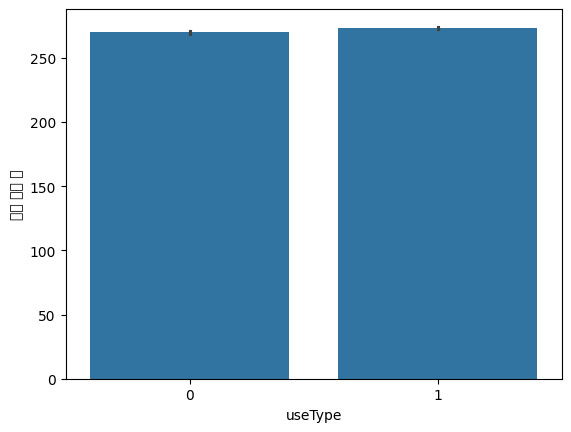

In [35]:
sns.barplot(x='useType', y='본문 단어 수', data=df)

In [27]:
df_x.reset_index(inplace=True)
df_o.reset_index(inplace=True)

In [28]:
df_x['본문 단어 수']

0         227
1         310
2         162
3         175
4         233
         ... 
107586    306
107587    294
107588    551
107589    186
107590    260
Name: 본문 단어 수, Length: 107591, dtype: int64

#### 2. 제목과 본문 일치도

In [26]:
import Levenshtein # Levenshtein 사용 
def levenshtein_distance(s1, s2):
    return Levenshtein.distance(s1, s2)

df_x['일치도'] = df_x.apply(lambda row: levenshtein_distance(row['newsTitle'], row['newsContent']), axis=1)
df_o['일치도'] = df_o.apply(lambda row: levenshtein_distance(row['newsTitle'], row['newsContent']), axis=1)

C:\Users\administ\ipykernel_20968\1939631648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['일치도'] = df_x.apply(lambda row: levenshtein_distance(row['newsTitle'], row['newsContent']), axis=1)
C:\Users\administ\ipykernel_20968\1939631648.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['일치도'] = df_o.apply(lambda row: levenshtein_distance(row['newsTitle'], row['newsContent']), axis=1)


In [27]:
print(f'낚시기사x 제목/본문 일치도 : {df_x['일치도'].mean()} ')
print(f'낚시기사 제목/본문 일치도 : {df_o['일치도'].mean()} ')
# 일치도는 낚시기사 아닌것이 높앗음 = good

낚시기사x 제목/본문 일치도 : 1043.0070870729369 
낚시기사 제목/본문 일치도 : 1041.6924624503793 


In [28]:
import difflib

def similarity_score(string1, string2):
    matcher = difflib.SequenceMatcher(None, string1, string2)
    return matcher.ratio()

# 데이터프레임의 각 행에 대해 유사성 계산
df_x['유사도'] = df_x.apply(lambda row: similarity_score(row['newsTitle'], row['newsContent']), axis=1)
df_o['유사도'] = df_o.apply(lambda row: similarity_score(row['newsTitle'], row['newsContent']), axis=1)

C:\Users\administ\ipykernel_20968\2262262308.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['유사도'] = df_x.apply(lambda row: similarity_score(row['newsTitle'], row['newsContent']), axis=1)
C:\Users\administ\ipykernel_20968\2262262308.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['유사도'] = df_o.apply(lambda row: similarity_score(row['newsTitle'], row['newsContent']), axis=1)


In [31]:
print(f'낚시기사x 제목/본문 유사도 : {df_x['유사도'].mean()} ')
print(f'낚시기사 제목/본문 유사도 : {df_o['유사도'].mean()}')

낚시기사x 제목/본문 유사도 : 0.04480092962671489 
낚시기사 제목/본문 유사도 : 0.04336602156106317
